## **Previsão de Churn em Clientes de Serviços Bancários com Cartão de Crédito** ##

Neste projeto, construirei um modelo de machine learning para prever a probabilidade de cancelamento de clientes (churn) em um serviço empresarial. O problema é de aprendizado supervisionado (com um conjunto de dados rotulado) para classificação binária, onde a variável alvo é 1 se o cliente cancelou, e 0 caso contrário.

Utilizarei o seguinte pipeline, com base na metodologia CRIP-DM:
1. Definir o problema de negócio.
2. Coletar os dados e obter uma visão geral.
3. Dividir so dados entre conjunto de treino e conjunto de teste.
4. Explorar os dados (Análise Exploratória de Dados - EDA).
5. Engenharia de atributos, limpeza e pré-processamento.
6. Treinamento do modelo, comparação, selecção de atributos e ajustes.
7. Teste a avaliação do modelo.
8. Conclusão e interpretação dos resultados.
9. Deploy.

Neste notebook, realizarei a análise exploratória dos dados (EDA), cobrindo os passos de 1 a 4 da pipeline acima. O objetivo é identificar padrões relevantes que nos ajudem a entender o perfil dos clientes que mais têm tendência a cancelar o serviço. Assim, mesmo antes de aplicar o modelo, já poderemos oferecer insights úteis para estratégias de retenção.

**1. Problema de Negócio**

A equipe de gestão está preocupada com a crescente taxa de cancelamento de clientes nos serviços oferecidos. Eles desejam um sistema que permitar prever, com antecedência, quais clientes estão em risco de churn, a fim de agir preventivamente com campanhas personalizadas, ofertas ou melhorias no atendimento.

**1.1 Qual o objetivo deste projeto?**
1. Identificar fatores associados ao churn.
2. Criar um modelo que preveja a probabilidade de um cliente cancelar os serviços.
3. Propor ações praticas para reduzir o churn com base nos resultados.

**1.2 Por que prever a probabilidade e não apenas churn sim/não?**
Ao prever a probabilidade de churn, conseguimos priorizar os clientes com maior risco, o que permite estratégias de retenção mais eficazes. Um modelo com previsões binarias pode ocultar nuances importantes. Já com pontuação de risco (ex: 83% de chance de churn), a empresa pode: 
* Agir rápidamente nos casos mais críticos.
* Distribuir os recursos de forma mais eficiente.
* Adaptar campanhas conforme o nível de risco.

**1.3 Quais os benfícios esperados?**
* Redução de custos com aquisição e retenção de clientes.
* Aumento na taxa de retenção.
* Melhoria na experiência dos clientes, com ações preventivas.
* Marketing mais direcionado eficiente.
* Proteção da receita, mantendo a base ativa de clientes.

Com isso, espera-se atacar a raiz do problema de churn e torna-lo previsível e gerenciavel.

2. **Entendimento do Dados**

O Conjunto de dados foi obetido atravéz do Kaggle, no seguinte link:
https://www.kaggle.com/datasets/rangalamahesh/bank-churn

A base contém informações detalhadas sobre clientes de um banco, incluindo dados demográficos, de perfil financeiro e caracteristicas contratuais. O objetivo é prever se um cliente deixará de utilizar os serviços do banco (churn). A variável alvo já está presente, onde: 
* `Exited = 1` indica que o cliente **cancelou** os seviços do banco.
* `Exited = 0` Indica que o cliente **permaneceu ativo**.

Carregando os dados

In [217]:
import pandas as pd
df = pd.read_csv(r'../data/Customer-Churn-Records.csv')

In [218]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

`CreditScore` - Pontuação de crédito do cliente. Valores mais altos indicam melhor histórico creditício e menor propensão a churn.  
`Geography` - País de residência do cliente (ex: França, Alemanha, Espanha). Fator geográfico que influencia padrões de comportamento.  
`Gender` - Gênero do cliente (Masculino/Feminino/Outro).  
`Age` - Idade do cliente em anos. Relaciona-se com padrões de consumo e risco de churn (ex: faixas etárias específicas têm maior rotatividade).  
`Tenure` - Tempo de relacionamento com o banco (em anos). Clientes com 1-3 anos podem apresentar maior risco de churn.  
`Balance` - Saldo médio anual na conta corrente. Saldos elevados geralmente correlacionam-se com menor probabilidade de saída.  
`NumOfProducts` - Quantidade de produtos bancários contratados (ex: conta corrente, investimentos, empréstimos).  
`HasCrCard` - Indica posse de cartão de crédito (0 = Não, 1 = Sim).  
`IsActiveMember` - Status de atividade do cliente (0 = Inativo, 1 = Ativo). Clientes inativos têm maior risco de churn.  
`EstimatedSalary` - Salário anual estimado do cliente (em unidades monetárias locais).  
`Exited` - **Variável target**: indica se o cliente encerrou o relacionamento com o banco (0 = Retido, 1 = Churn).  
`Complain` - Registro de reclamações formalizadas nos últimos 12 meses (0 = Sem reclamações, 1 = Com reclamações).  
`Satisfaction Score` - Nível de satisfação mensurado em pesquisas.  
`Card Type` - Categoria do cartão predominante (ex: Standard, Gold, Platinum, Premium).  
`Point Earned` - Pontos acumulados no programa de fidelidade associado ao cartão de crédito.  

In [220]:
df.describe().T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
1,CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
2,CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
3,Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
4,Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
5,Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
6,NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
7,HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
8,IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
9,EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Estatísticas descritivas - Principais Insights**

Com base na análise descritiva das variáveis numéricas, é possivel destacar os seguintes pontos:
1. `CreditScore`:
    * Média aprovimada de 650 pontos, com desvio padrão de 96.
    * Os scores variam de 350 a 850, o que indica ampla diversidade no perfil de risco dos clientes.
2. `Age`:
    * A média de idade é de 38 anos, como mínimo de 18 e máximo de 92.
    * Clientes de determinadas faixas etárias podem representar maior risco de churn.
3. `Tenure`:
    * Varia de 0 a 10 anos, com a média em 5 anos.
    * O tempo de casa pode ser uma variável importante, clientes novos podem cancelar mais fácilmente.
4. `Balance`:
    * A média do saldo é em torno de 76.000, com desvio padrão alto (62.000), o que indica forte dispersão.
    * O valor máximo é de 250.898, e o mínimo é de 0. Importante verificar se o valdo 0 tem relação com o churn.
5. `NumOfProducts`: 
    * A maior parte dos cliente tem entre 1 e 2 produtos.
    * Há casos com até 4 produtos, que merecem atenção.
6. `EstimatedSalary`:
    * A média é de 100.000, com uma distribuição quase uniforme (mínimo de 11 mil, máximo de 199 mil).
    * Aparentemente, o salário não é um fator limitante, mas pode afetar o churn combinado com outros fatores.
7. `Satisfaction Score`: 
    * A média é de 3.01, com a maioria do clientes ficando entre 2 e 4. A distribuição sugere tendência a neutralidade, com 25% dos clientes ficando abaixo de 2, o que pode representar um grupo crítico.
    * Pode haver uma correlação direta entre baixa satisfação e churn, tornando essa variável potencialmente muito relevante para o modelo preditivo e para estratégias de retenção.

Procurar por dados faltante e duplicados.

In [221]:
print(df['Exited'].value_counts(normalize=True) * 100)

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


O conjunto está desbalanceado. No momento da avaliação dos modelos, a metrica **acuracia** não podera ser considerada.

In [222]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [223]:
df.duplicated().sum()

np.int64(0)

3. **Divisão dos Dados em Conjuntos de Treino e Teste**

Primeiramente, vou dividir o conjunto de dados em dois subconjunto: **treinamento** e **teste**.
* O conjunto de teste deve conter dados que o modelo ainda não viu durante o treinamento.
* A análise exploratória (EDA) será feita apenas no conjunto de treino, a fim de evitar *data leakage* (vazamanto de dados), garantir uma representação mais realista e permitir uma avaliação mais preicisa do modelo de dados "novos".
* Além disso, utilizarei o parâmetro `stratify=y` na função `train_test_split` para assegurar que a proporção da classe alvo seja mantida em ambos os conjuntos. Isso é especialmente útil em cenários de classses desbalanceadas, como é o caso, já que há mais clientes ativos do que clientes que cancelaram.

In [224]:
df.rename(columns={'Exited':'churn_flag'}, inplace=True)

In [225]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f'Formato do conjunto de preditores de treino: {X_train.shape}')
print(f'Formato do conjunto de alvo de treino: {y_train.shape}')
print(f'Formato do conjunto de preditores de teste: {X_test.shape}')
print(f'Formato do conjunto de alvo de teste: {y_test.shape}')

print('\n Proporção das classes no conjunto de treino:')
print(y_train.value_counts(normalize=True))

print('\n Proporção das classes no conjunto de teste:')
print(y_test.value_counts(normalize=True))

Formato do conjunto de preditores de treino: (8000, 17)
Formato do conjunto de alvo de treino: (8000,)
Formato do conjunto de preditores de teste: (2000, 17)
Formato do conjunto de alvo de teste: (2000,)

 Proporção das classes no conjunto de treino:
churn_flag
0    0.79625
1    0.20375
Name: proportion, dtype: float64

 Proporção das classes no conjunto de teste:
churn_flag
0    0.796
1    0.204
Name: proportion, dtype: float64


4. **Análise Exploratória do Dados (EDA)**

Objetivo desta etápa é entender melhor os dados do conjunto, idenfificar padrões, detectar possíveis outliers, e exploar as variáveis mais relevantes para o churn. Tudo isso antes de iniciar a modelagem

In [226]:
df_treino = pd.concat([X_train, y_train], axis=1)
df_treino.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,churn_flag
4791,4792,15746461,Taylor,709,Spain,Male,35,2,0.00,2,1,0,104982.39,0,2,GOLD,422,0
8881,8882,15618647,Kornilova,744,France,Male,29,1,43504.42,1,1,1,119327.75,0,1,PLATINUM,607,0
6166,6167,15567431,Kodilinyechukwu,773,France,Male,64,2,145578.28,1,0,1,186172.85,0,1,SILVER,630,0
4473,4474,15713532,Wang,646,Germany,Female,29,4,105957.44,1,1,0,15470.91,0,1,PLATINUM,345,0
854,855,15601589,Baresi,675,France,Female,57,8,0.00,2,0,1,95463.29,0,3,SILVER,632,0


In [227]:
features_numericas = df_treino.select_dtypes('number').columns.to_list()
features_numericas.remove('RowNumber')
features_numericas.remove('CustomerId')

features_categoricas = df_treino.select_dtypes('object').columns.to_list()
features_categoricas.remove('Surname')

print(f'O Conjunto possui {len(features_numericas)} features numéricas. Sendo elas:')
print(features_numericas)

print(f'O Conjunto possui {len(features_categoricas)} features categóricas. Sendo elas:')
print(features_categoricas)

O Conjunto possui 12 features numéricas. Sendo elas:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned', 'churn_flag']
O Conjunto possui 3 features categóricas. Sendo elas:
['Geography', 'Gender', 'Card Type']


In [228]:
for feature in features_categoricas:
    print(feature)
    print('='*40)
    print(f'Esses são os valore unicos da {feature}:')
    print(df_treino[feature].value_counts(normalize=True))

Geography
Esses são os valore unicos da Geography:
Geography
France     0.500375
Germany    0.251250
Spain      0.248375
Name: proportion, dtype: float64
Gender
Esses são os valore unicos da Gender:
Gender
Male      0.548625
Female    0.451375
Name: proportion, dtype: float64
Card Type
Esses são os valore unicos da Card Type:
Card Type
GOLD        0.254750
PLATINUM    0.249625
SILVER      0.248250
DIAMOND     0.247375
Name: proportion, dtype: float64


`Card Type` é uma variavel categórica ordinal.

**Análise univáriada**

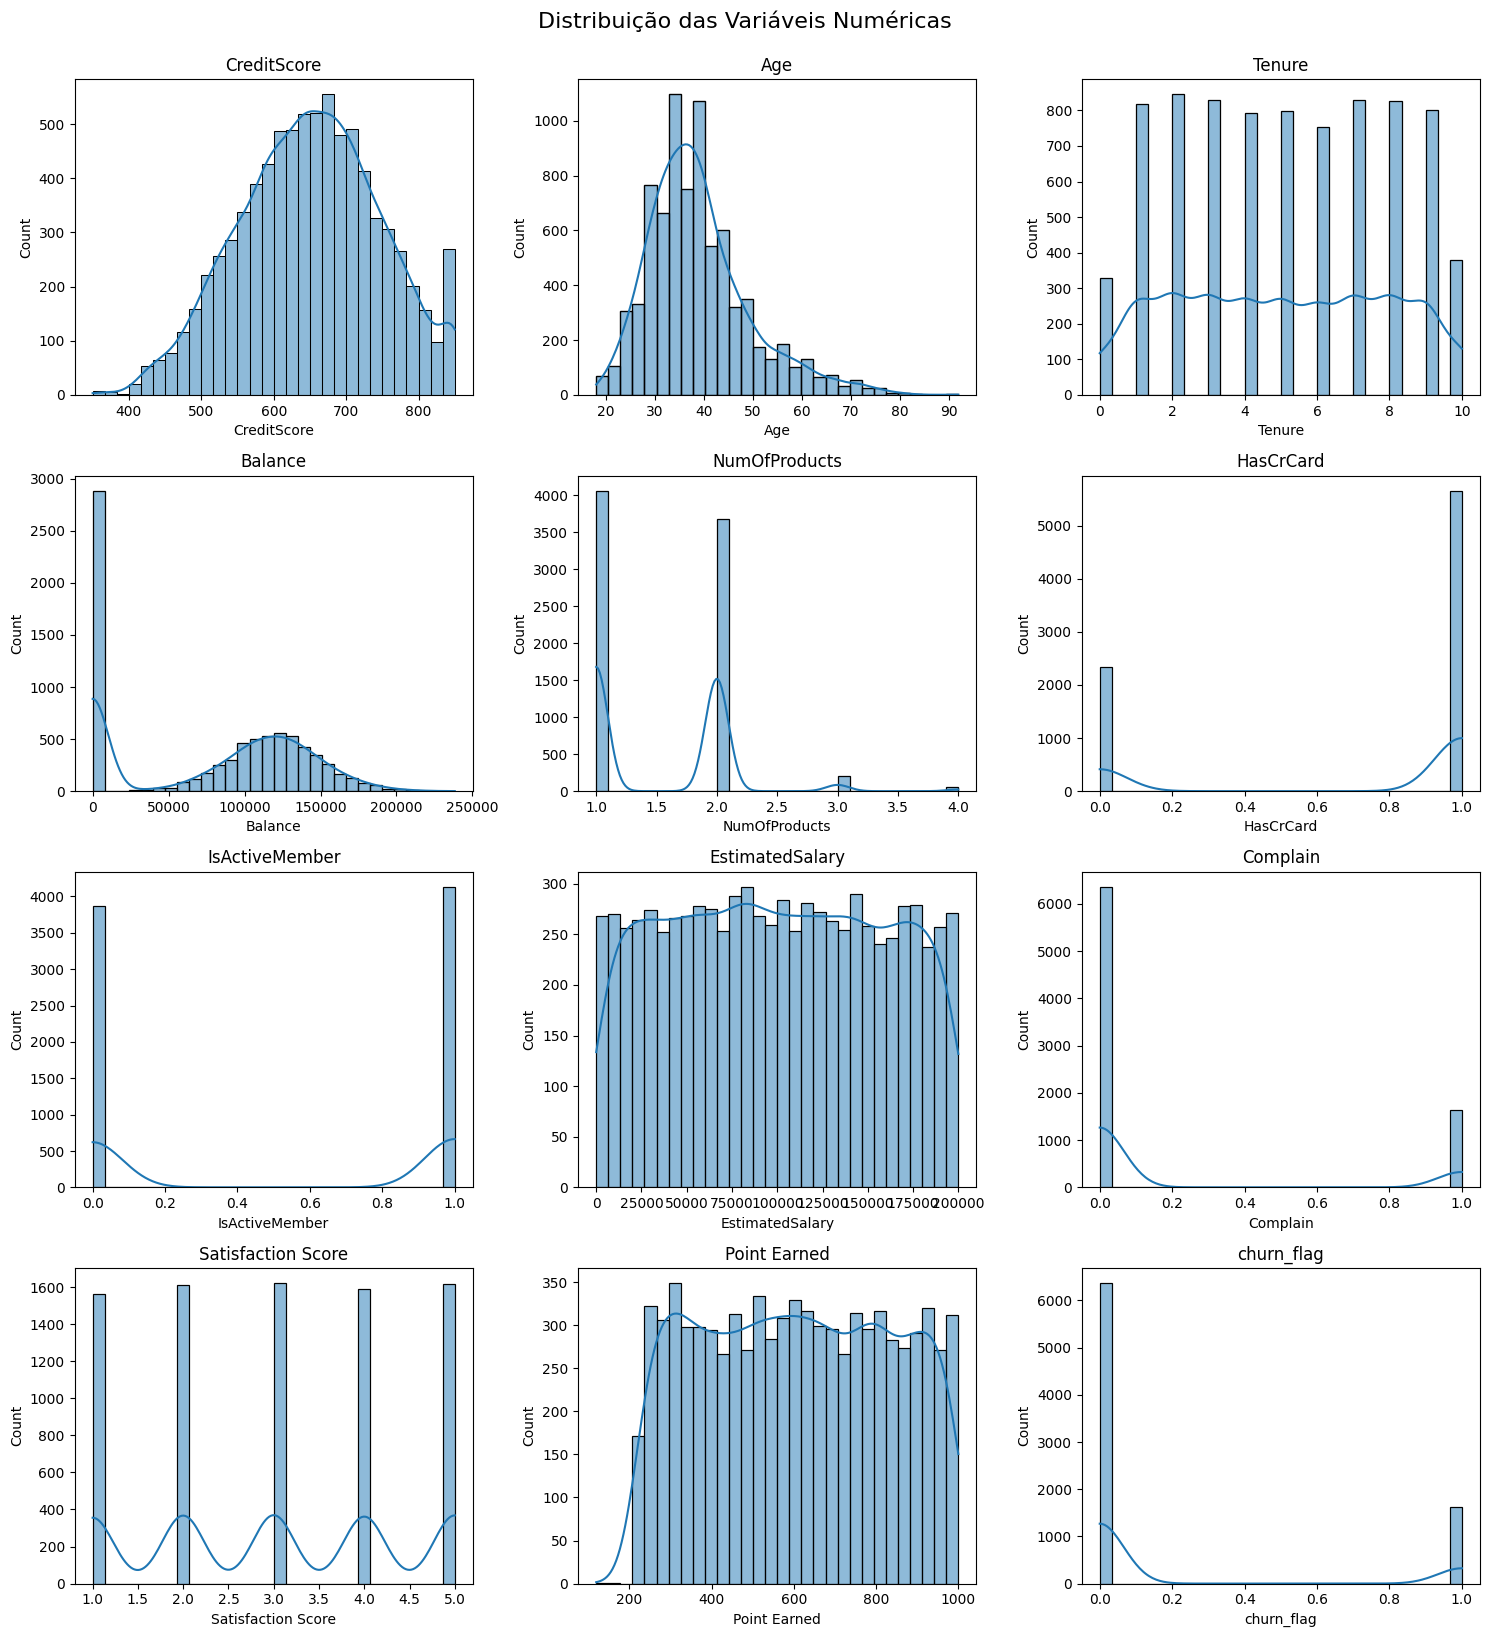

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = features_numericas
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols  
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_treino[col], bins=30, kde=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, y=1.02)

plt.savefig('distribuicao_variaveis_numericas.png', dpi=300, bbox_inches='tight')

plt.show()


* `CreditScore`:
    * A pontuação de crédito parece ter uma distribuição aproximadamente normal, levemente assimétrica à esquerda, com a maioria dos cliente entre 550 e 750.
    * Isso pode indicar que a base de cliente é composta predominantemente por indivíduos com pontuação de crédito médias e altas. Há menos clientes com pontuação muito baixas ou muito alta.

* `Age`:
    * Apresenta uma assimetria à direita, com um pico claro na faixa de 30-40 anos. A maioria dos cliente tem entre 25 e 50 anos.
    * A maior parte da base de cliente é composta por adultos jovens e de meia-idade. Há uma diminuição gradual no número de clientes à medida que a idade aumenta.

* `Tenure`:
    * A Distribuição é relativamente uniforme para a faixa entre 1 e 9 anos, indicando uma boa retenção durante esse periodo. Já para 0 (cliente novos) e 10 (clientes de longa data) apresenta uma menor contagem.
    * Isso pode indicar desafios em duas feses criticas do ciclo de vida do cliente: Aquisição/Retenção de novos clientes; Retenção de clientes de loga data

* `Balance`:
    * Variável muito assimétrica, com um pico muito acentuado em 0. A grenede maioria dos cliente possui saldo bancário zerado.
    * A esmagadora maioria dos clientes não mantém um saldo financeiro na instituição, ou o serviço é utilizado para transações que não envolvem a manutenção de capital. Isso pode indicar uma grande proporção de contas inativas, contas de passagem (para receber pagamentos e transferir imediatamente) ou clientes que utilizam outros produtos/serviços da empresa que não exigem saldo (ex: crédito, investimentos em outras plataformas). É essencial investigar o motivo desse saldo zero predominante para entender o perfil de uso da base de clientes.

* `NumOfProducts`:
    * A maior parte dos cliente utiliza 1 ou 2 produtos, com um pico maior em 1. Há um queda muito grande na frequência de 3 ou 4 produtos.
    * A estratégia de venda de produtos ou demanda dos clientes se concentra em 1 ou 2 produtos por cliente.

* `HasCrCard`:
    * Variável binaria. A grande maioria dos cliente possui cartão de crédito.
    * O cartão de cŕedito é um produto quase universal na base de clientes.

* `IsActiveMember`:
    * Variável binaria que indica se o cliente é ativo ou não, com uma ligeira predominância de menbros ativos.
    * A base de cliente está dividida de forma relativamente equilibrada entre ativos e não ativos.

* `EstimatedSalary`:
    * A distribuição de salário estimada é relativamente uniforme, o que não é muito comum. Isso pode indicar que a váriável é estimada com alguma aleatoriedade, ou que o dataset tem uma distribuição de renda bem equilibrada.
    * Não há uma concentração forte em nenhuma faixa salarial especifica.

* `Complain`:
    * Variável binária. A Grande maioria dos clientes não registrou reclamações.
    * A taxa de reclamações é muito baixa, o que é um bom sinal para a satisfação do cliente ou a eficiência do processo de resolução de problemas.

* `Satisfaction Score`:
    * Variável discreta, com valores de 1 a 5. A frequência de clientes em cada uma das pontuações não apresenta grandes variações.
    * A distribuição "plana", indica que não há uma grande concentraçõa de clientes em nenhum nível de satisfação.

* `Point Earned`: 
    * A distribuição de frequência também é consideravelmente uniforme ao longo da maior parte das dados (aproximadamente 250 a 1000). No entanto, há um vale na faixa de 0 e aproximadamente 250 pontos.
    * pode ser um indicador que de é mais dificil ou menos comum para os clientes acumularem poucos pontos.

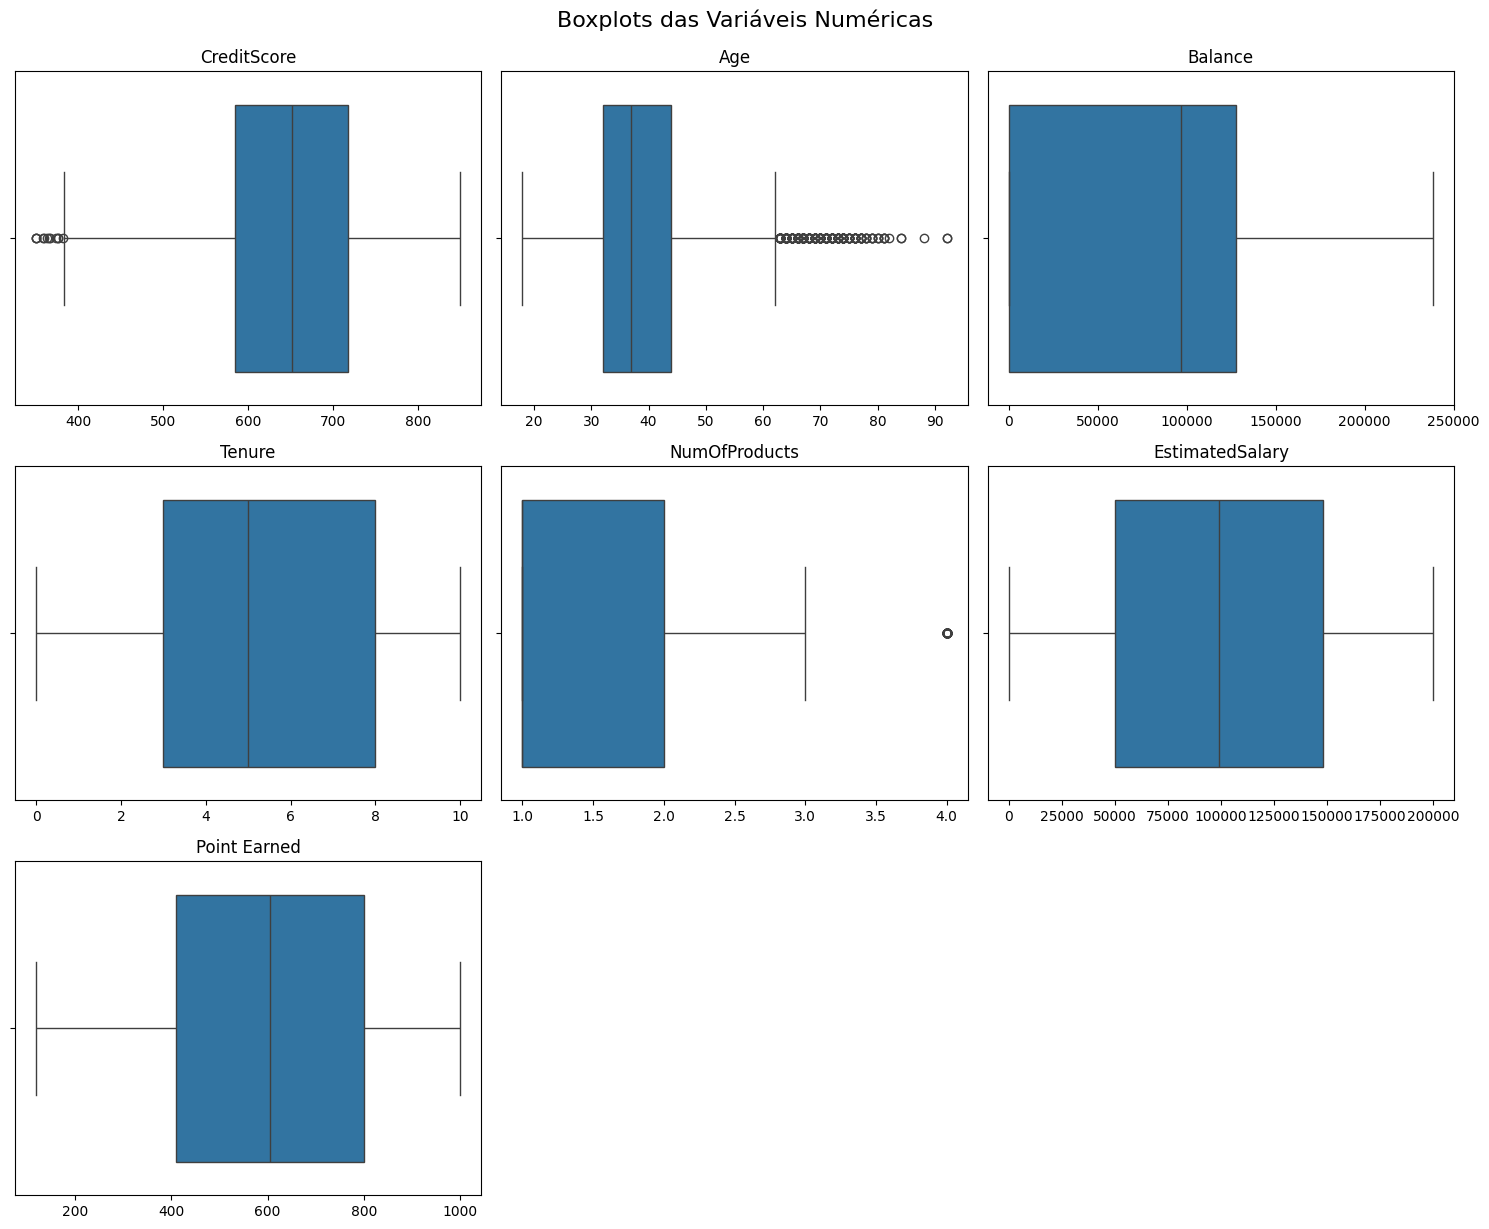

In [230]:
num_cols_for_boxplot = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']
n_cols = 3
n_rows = (len(num_cols_for_boxplot) + n_cols - 1) // n_cols 
plt.figure(figsize=(n_cols * 5, n_rows * 4)) 

for i, col in enumerate(num_cols_for_boxplot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_treino[col]) 
    plt.title(col)
    plt.xlabel('') 

plt.tight_layout()
plt.suptitle('Boxplots das Variáveis Numéricas', fontsize=16, y=1.02) 

plt.savefig('Boxplots_variaveis_numericas.png', dpi=300, bbox_inches='tight')

plt.show()

`CredtScore`:
* Há uma serie de pontos à esquerda do bigode inferior. Um indicativo da presença de outliers.
* Existem clientes com uma pontuação de crédito significativamente menor.

`Age`:
* Caixa ligeiramente deslocada para a esquerda, e o bigode é mais curto que o superior, indicando uma leve assimetria. Confirmando o que já foi observado no histograma.
* Há uma série de pontos a direita, acima do bigode superior. Isso significa que existem clientes com idade significativamente mais avançada em comparação com a maioria da base.
* Possivel nicho de cliente com necessidade de atendimento difetente.

`NumOfProducts`: 
* Há alguns pontos à direita, acima do bigode superior, especificamente para clientes com 4 produtos.
* A grande maioria dos clientes utiliza 1 ou 2 produtos. Os clientes com 3 ou 4 produtos são considerados outliers estatísticos por este método, o que corrobora que a adoção de múltiplos produtos é rara. Isso pode indicar uma oportunidade (se a empresa quiser que os clientes usem mais produtos) ou uma limitação do portfólio de produtos que impede a adoção de mais itens.

**Distribuição das features categoricas**

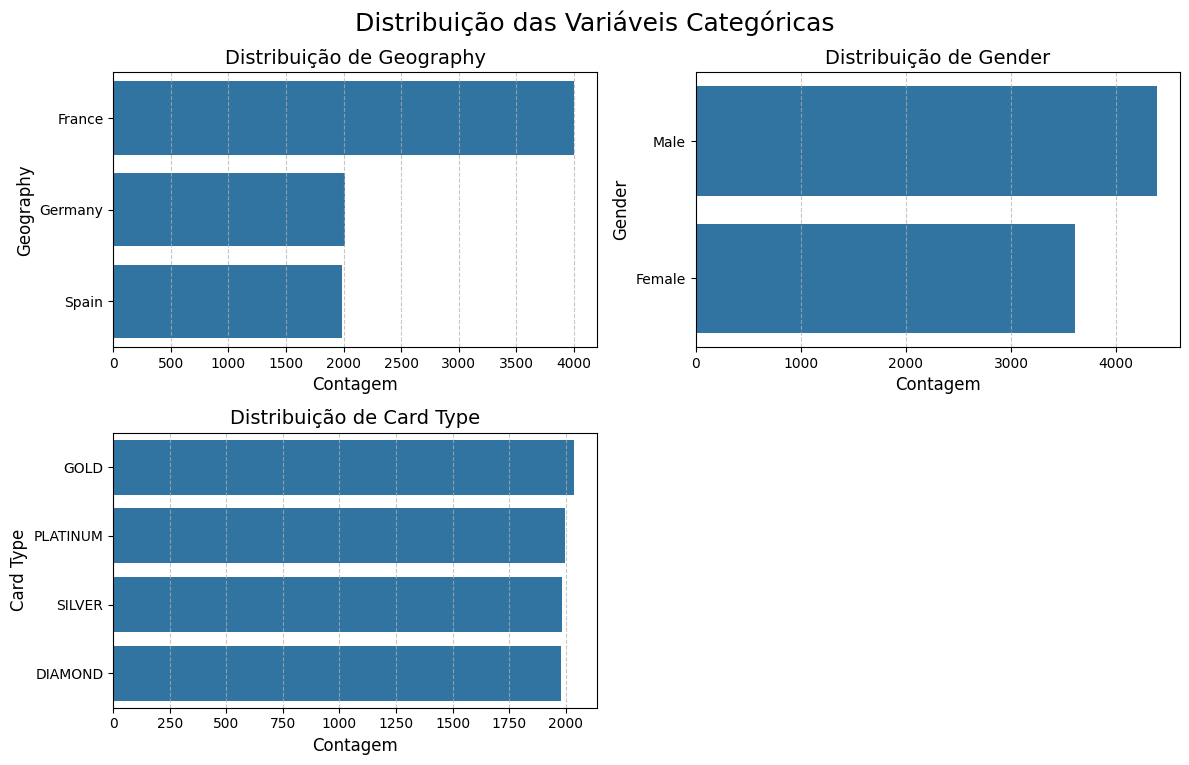

In [231]:
n_cols = 2
n_rows = (len(features_categoricas) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4)) 

for i, col in enumerate(features_categoricas, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.countplot(data=df_treino, y=col, order=df_treino[col].value_counts().index)
    
    plt.title(f'Distribuição de {col}', fontsize=14)
    

    plt.xlabel('Contagem', fontsize=12) 
    plt.ylabel(col, fontsize=12)
    
    plt.xticks(rotation=0)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle('Distribuição das Variáveis Categóricas', fontsize=18, y=0.98)

plt.show()

* A maior concentração de clientes está na Frnaca.
* A quantidade de clientes do sexo marculino é ligeiramente maior.
* A distribuição entre os tipos de cartões é consideravelmente homogenea.

**Análise bivariada**

Vou usar uma matrix de correlação para tentar identificar a existência de algum nivel de correlação linear entre as variáveis numéricas e o target.

In [232]:
matrix_correlacao = df_treino.corr(numeric_only=True)
matrix_correlacao['churn_flag'].sort_values(ascending=False)

churn_flag            1.000000
Complain              0.995773
Age                   0.280432
Balance               0.120726
EstimatedSalary       0.017851
Satisfaction Score   -0.003726
Tenure               -0.004108
RowNumber            -0.008573
CustomerId           -0.010551
Point Earned         -0.012095
HasCrCard            -0.016526
CreditScore          -0.030191
NumOfProducts        -0.048662
IsActiveMember       -0.147864
Name: churn_flag, dtype: float64

* `Complain`: Existem correlação positiva entre a variável e o target.
* `Age`: Existem uma correlção positiva moderada.
* `Balance`: Existem uma correlação positiva fraca.

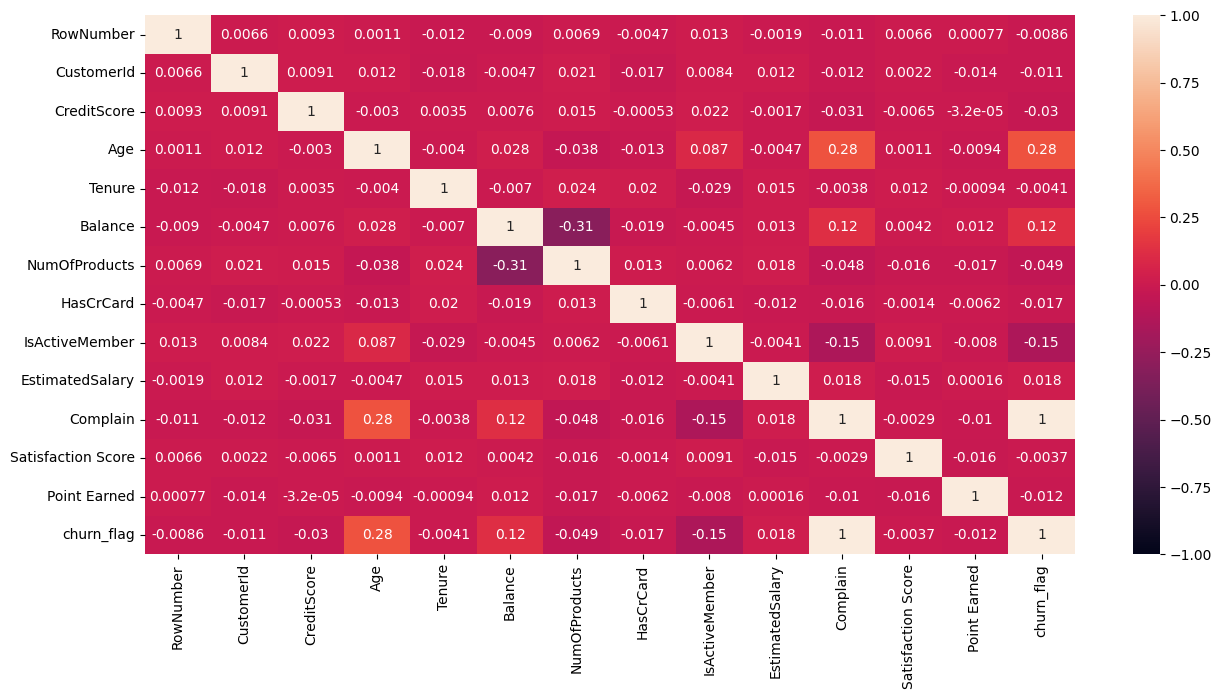

In [233]:
plt.figure(figsize=(15, 7))
sns.heatmap(matrix_correlacao, vmin=-1, vmax=1, annot=True)

plt.savefig('matrix_corelação.png', dpi=300, bbox_inches='tight')

plt.show()

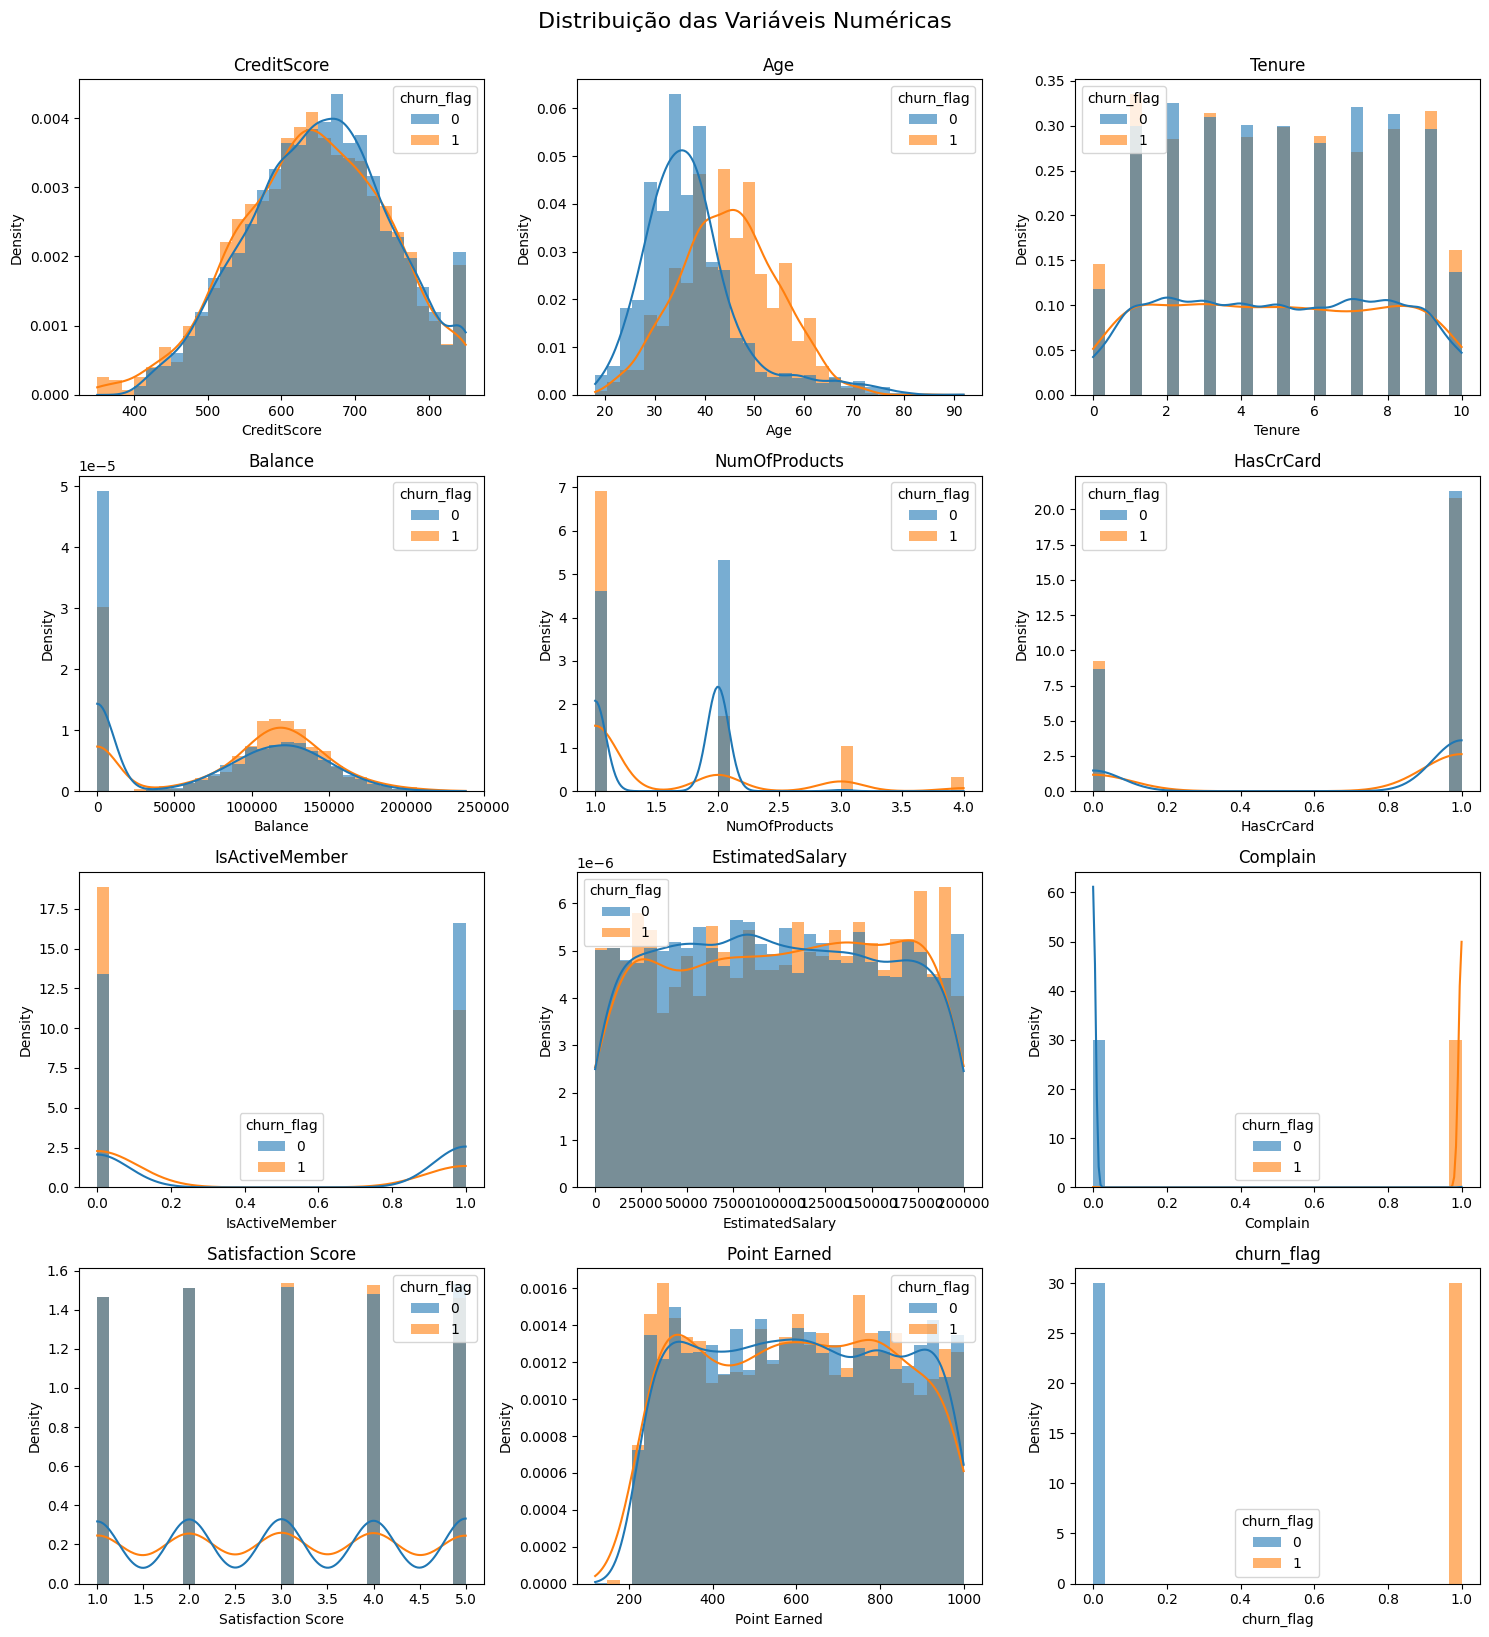

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = features_numericas
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols 

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df_treino, x=col, bins=30, kde=True, hue='churn_flag', 
                 common_norm=False, stat='density', alpha=0.6, linewidth=0)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, y=1.02)

plt.savefig('distribuicao_variaveis_numericas.png', dpi=300, bbox_inches='tight')

plt.show()


* `CreditScore`: Leve tendência para cliente de pontuação menor realizarem churn.
    * Clientes com pontuação muito boas (acima de 700), tem menor propensão ao churn.
    * Cliente com pontuação menores que 700, tem uma leve tendencia ao churn.
* `Age`: Clientes que realizam churn tendem a ser, em média, mais velhos o que os que permanecem.
    * Cliente mais jovens (20-35 anos), parecem ter uma menor propensão de churn.
    * Cliente mais velhos (Apartir de 40 anos), tem mais propensão a ao churn.

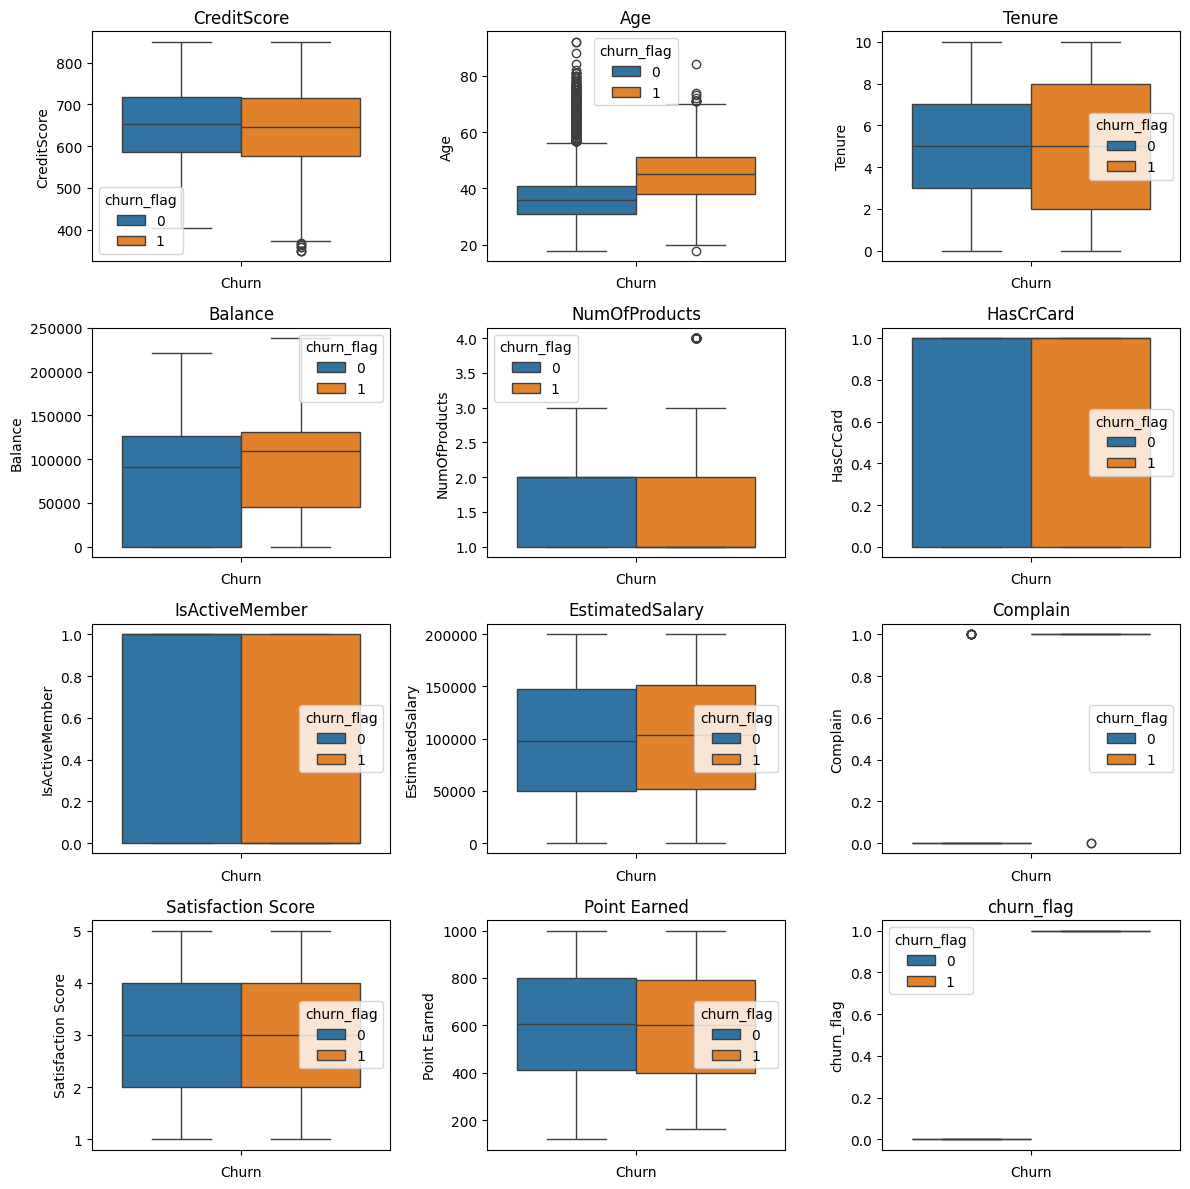

In [235]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols


plt.figure(figsize=(n_cols * 4, n_rows * 3))


for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=col, data=df_treino, hue='churn_flag', legend=True)
    plt.title(col)
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [236]:
contingencia = pd.crosstab(df['HasCrCard'], df_treino['churn_flag'])
contingencia

churn_flag,0,1
HasCrCard,,
0,1839,501
1,4531,1129


In [237]:
# Teste Qui-quadrado
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingencia)

print(f'Estatística do Qui-quadrado: {chi2:.4f}')
print(f'p-valor: {p:.4f}')


Estatística do Qui-quadrado: 2.0957
p-valor: 0.1477


`CreditScore`:
* Como já observado anteriormente, os cliente que deram churn tem em média, uma pontuação levemente menor.
* A diferença é insignificante.

`Age`:
* A distribuição de idade no grupo de churn é maior e mais dispersa.
* O grupo não churn tem outliers com idades maiores do que o grupo churn. Investigar se isso pode interferir no desempenho do modelo.

`Balance`:
* Clientes que deram churn parecem ter um saldo médio mais alto em suas contas.

`EstimatedSalary`:
* Aparentemente a diferença entre os dois grupos é insignificante. 
* Pode ser bom realizar um testagem

In [238]:
salario_churn = df_treino[df_treino['churn_flag'] == 1]['EstimatedSalary']
salario_nao_churn = df_treino[df_treino['churn_flag'] == 0 ]['EstimatedSalary']

print(f'Média salárial (Não Churn) {salario_nao_churn.mean():.2f}')
print(f'Média salárial (Churn) {salario_churn.mean():.2f}')

print(f'Médiana salárial (Não Churn) {salario_nao_churn.median():.2f}')
print(f'Médiana salárial (Churn) {salario_churn.median():.2f}')

print(f'Desvio Padrão salárial (Não Churn) {salario_nao_churn.std():.2f}')
print(f'Desvio Padrão salárial (Churn) {salario_churn.std():.2f}')

Média salárial (Não Churn) 99000.95
Média salárial (Churn) 101545.98
Médiana salárial (Não Churn) 97899.85
Médiana salárial (Churn) 103447.70
Desvio Padrão salárial (Não Churn) 57247.26
Desvio Padrão salárial (Churn) 58105.58


Definição de hipoteses:
* **Hipotese Nula (H_0):** Não há diferença significativa nas distribuições de `EstimatedSalary` entre os clientes que dão churn e os que não dão.
* **Hipotese Alternativa:** Há uma diferença estaticamente significativa na distribuição de `EstimatedSalary` entre os clientes que dão churn e os que não dão.

Definição do nível de significânci:

In [239]:
import scipy.stats as stats
alpha = 0.05

shapiro_nao_churn = stats.shapiro(salario_nao_churn)
shapiro_churn = stats.shapiro(salario_churn)

print(f"\nTeste de Normalidade (Shapiro-Wilk) para Salário (Não Churn): p-valor = {shapiro_nao_churn.pvalue:.4f}")
print(f"Teste de Normalidade (Shapiro-Wilk) para Salário (Churn): p-valor = {shapiro_churn.pvalue:.4f}")


Teste de Normalidade (Shapiro-Wilk) para Salário (Não Churn): p-valor = 0.0000
Teste de Normalidade (Shapiro-Wilk) para Salário (Churn): p-valor = 0.0000


/home/camargo/Área de trabalho/custumer-churn-analysis/.env-churn/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6370.
  res = hypotest_fun_out(*samples, **kwds)


Como visualizado gráficamente, os dados não seguem uma distribuição normal.

In [240]:
mannwhitney_stat, p_val_mw = stats.mannwhitneyu(salario_nao_churn, salario_churn, alternative='two-sided')
print(f"\nTeste de Mann-Whitney U: Estatística = {mannwhitney_stat:.4f}, p-valor = {p_val_mw:.4f}")
test_name = "Teste de Mann-Whitney U"
p_value = p_val_mw


Teste de Mann-Whitney U: Estatística = 5058414.0000, p-valor = 0.1096


Com base nos dados disponiveis e no nivel de significância ($\alpha$ = 0.05) escolhido, não há evidência estatisticamente significativas para rejeitar a hipotese de que não exite diferença na distribuição do salário estimado entre os grupos de clientes com e sem churn.

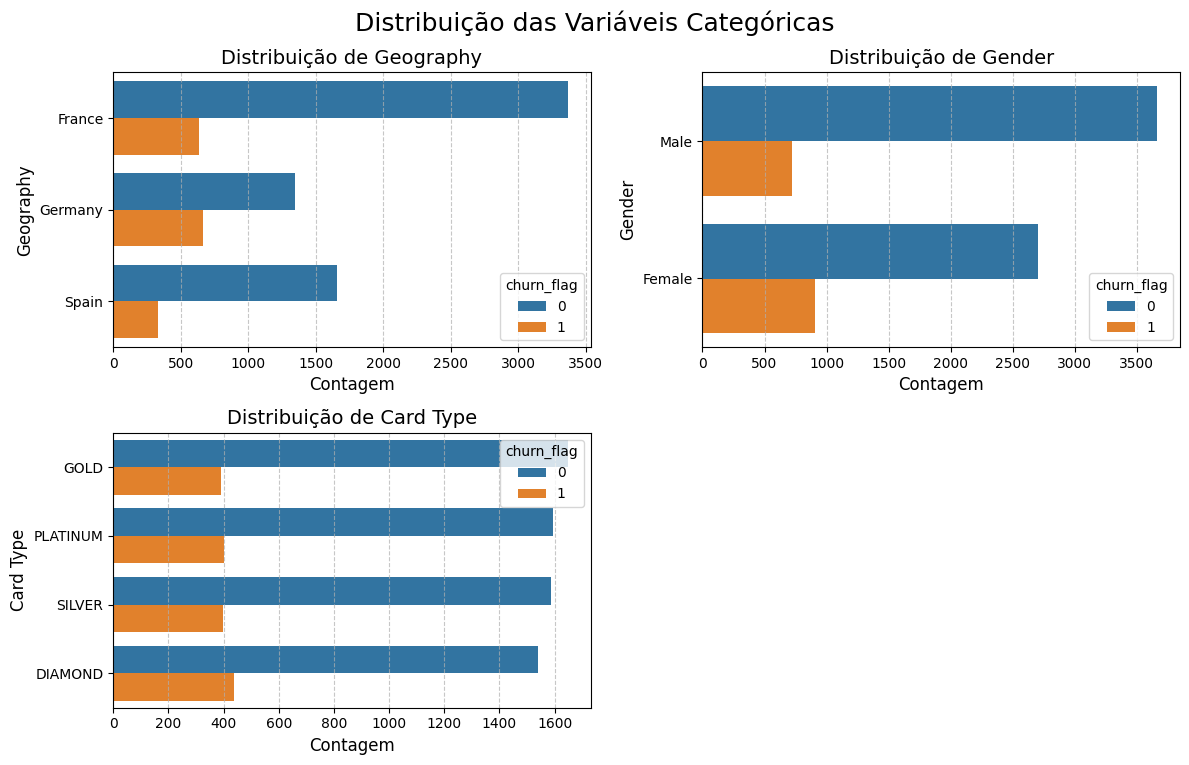

In [241]:
n_cols = 2
n_rows = (len(features_categoricas) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4)) 

for i, col in enumerate(features_categoricas, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.countplot(data=df_treino, y=col, hue='churn_flag', order=df_treino[col].value_counts().index)
    
    plt.title(f'Distribuição de {col}', fontsize=14)
    

    plt.xlabel('Contagem', fontsize=12) 
    plt.ylabel(col, fontsize=12)
    
    plt.xticks(rotation=0)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle('Distribuição das Variáveis Categóricas', fontsize=18, y=0.98)

plt.show()

**Conclusões da análise exploratória de dados**

A Análise Exploratória de Dados (EDA) forneceu insights valiósos sobre os fatores que influenciam a probabilidade de churn em cliente. Estes achados são cruciaias para a formulção de estratégias de retenção mais eficazes e direcionadas. As principais observações são:

1. **Distribuição do churn**
* A variável `churn_flag` está desbalanceada, com aproximadamente 20% dos clientes sendo rotúlados como "churners". Essa desproporsão indica a necessidade de aplicar técnicas para lidar com o desbalanceamento durante o treinamento do modelo.

2. **Idade dos clientes** - `Age`
* Cliente que realizaram churn tendem a estar na faixa de 40 e 65 anos, com um pico de churn por volta dos 45.
* A idade se mostrou uma variável relevante na diferenciação entre os grupos.

3. **Renda mensal - `Monthly_Income`**
* Embora a média e a mediana salarial dos churners sejam ligeiramente mais altas do que a dos não churners, não há evidências estatiscamente sigificativas de que a distribuição dos salários seja diferente entre os dois grupos.
* Conclui-se que o sálario estimado não é uma variável discriminante entre o churners neste dataset.

4. **Número de produtos - `NumOfProducts`**
*  A maior parte dos cliente possuem 1 ou dois produtos. No entanto, cliente com apenas 1 produto representam taxa maior de churn.
* Embora o número de clientes com 3 ou 4 produtos seja pequeno, a maior parte desses clientes apresentou churn.

5. **Tempo de contrato - `Tenure`**
* Os clientes tem maior propensão ao churn antes de completarem seu primeiro ano. 
* Obeservei uma maior tendência ao churn entre os cliente mais antigos, especialmente na faixa de 9 e 10 anos.

6. **Saldo em conta - `Balance`**
* A grande parte dos cliente não possui saldo em conta.
* A maior propensão ao churn se concentra na faixa de cliente com saldo entre 100.000 a 150.000.

7. **Possuir cartão de crédito - `HasCrCard`**
* A análise gráfica mostrou mínima na proporção de cliente que realizaram churn. Mas o teste Qui-quadrado mostrou que não existe associação estatisticamente significativa entre a posse de cartão ed crédito e a ocorrência de churn.

8. **Reclamação - `Complain`**
* Na totalida dos cliente que realizaram algum tipo de reclamação tedem a realizar churn.

9. **Pais - `Geograpy`**
* A Alemanha apresenta uma tendência proporional ao churn visivelmente maior quando comparada aos outros paises.
* Embora a França tenha um maior número de clientes, a proporção de churn em relação ao seu total de clientes ainda é significativamente menor que a da Alemanha.
* A Espanha possui um número intermediário de clientes e sua taxa de churn relativa parece ser a menor entre os três países.

**5. Modelagem e engenharia de atributos**

Etapa onde serão criados, tranformados ou selecionados os atributos para melhorar o desempenho preditivo de modelo.
**Objetivo:** Otimizar a qualidade dos dados fornecidos ao modelo, aumentando sua capacidade de identificar padrões, reduzindo ruído e melhorando a precisão, interpretabilidade e eficiência do modelo.

In [242]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn_flag,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [243]:
drop_coll = ['RowNumber', 'CustomerId', 'Surname']
df_treino.drop(columns=drop_coll, inplace=True)
print(f'Foram excluídas as colunas {drop_coll}')

Foram excluídas as colunas ['RowNumber', 'CustomerId', 'Surname']


In [244]:
df_treino.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
churn_flag            0
dtype: int64

In [245]:
df_treino.duplicated().sum()

np.int64(0)

In [246]:
# Codificação binária
df_treino['Gender'] = df_treino['Gender'].map({'Male':1, 'Female':0})

In [247]:
# One-Hot Encoding 
df_treino = pd.get_dummies(df_treino, columns=['Geography'])

In [248]:
ordem_cartao = {
    'SILVER': 1,
    'GOLD': 2,
    'PLATINUM': 3,
    'DIAMOND': 4
}
df_treino['Card Type'] = df_treino['Card Type'].map(ordem_cartao)

In [249]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train = df_treino.drop('churn_flag', axis=1)
y_train = df_treino['churn_flag']

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns

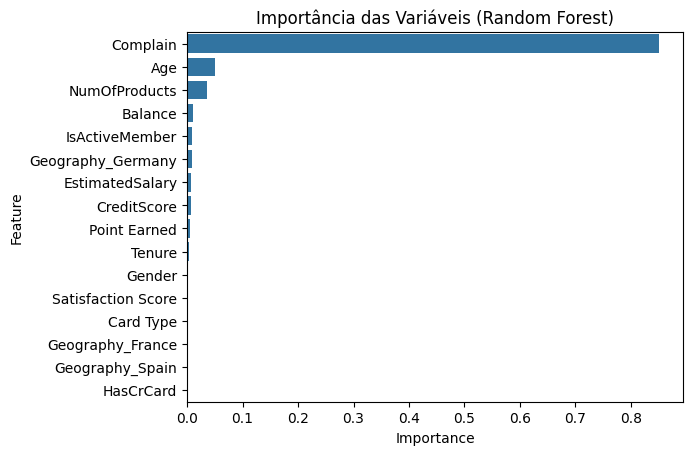

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title('Importância das Variáveis (Random Forest)')
plt.show()

In [251]:
import pandas as pd
print(df_treino.groupby(['Complain', 'churn_flag']).size())


Complain  churn_flag
0         0             6361
          1                2
1         0                9
          1             1628
dtype: int64


A variável `Complain` apresenta um desbalanceamento muito grande. Cerca de 99.3% dos clientes que fizeram alguma cleramação deram churn.
Por hora, a melhor opção é remover essa variável do modelo.

In [252]:
X = df_treino.drop( ['Complain'], axis=1)

**Padronização de variáveis numéricas**
É o processo onde os dados númericos são convertidos para uma mesma escala.
Alguns algoritmos são sensiveis a escalas muito diferentes, e podem dar peso desproporcional às variàveis com valores maiores.

`fit_tranform()` pode ser dividido em duas partes:
* `fit`: Parte que vai obter as "medidas" dos dados. Ele analisa os dados o obtem valores como média, desvio padrão, mínimo e máximo de cada variável.

* `tranform`: Usando as medidas aprendidas anteriormente, ele aplica a trasnformação nos dados, carregando cada ponto de dado e convertendo para uma nova escala.

In [253]:
from sklearn.preprocessing import StandardScaler
numerical_cols = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'EstimatedSalary', 'Satisfaction Score', 'Point Earned'
]

scaler = StandardScaler()
df_treino[numerical_cols] = scaler.fit_transform(df_treino[numerical_cols])

In [254]:
df_treino.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,churn_flag,Geography_France,Geography_Germany,Geography_Spain
4791,0.603488,1,-0.372143,-1.040992,-1.226957,2,1,0,0.095131,0,-0.716881,2,-0.814382,0,False,False,True
8881,0.965469,1,-0.940679,-1.386980,-0.528700,1,1,1,0.344941,0,-1.425962,3,0.003981,0,True,False,False
6166,1.265396,1,2.375783,-1.040992,1.109612,1,0,1,1.508981,0,-1.425962,1,0.105723,0,True,False,False
4473,-0.048079,0,-0.940679,-0.349016,0.473688,1,1,0,-1.463621,0,-1.425962,3,-1.154997,0,False,True,False
854,0.251849,0,1.712490,1.034937,-1.226957,2,0,1,-0.070635,0,-0.007800,1,0.114570,0,True,False,False


**Orquestração do Pré-Processamento**

Fase onde as etapas anteriores são organizadas e ordenadas de uma nameira mais clara.

`ColumnTransformer` serve como um passo a passo do que deve ser aplicado aos dados.

In [255]:
X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f'Formato do conjunto de preditores de treino: {X_train.shape}')
print(f'Formato do conjunto de alvo de treino: {y_train.shape}')
print(f'Formato do conjunto de preditores de teste: {X_test.shape}')
print(f'Formato do conjunto de alvo de teste: {y_test.shape}')

print('\n Proporção das classes no conjunto de treino:')
print(y_train.value_counts(normalize=True))

print('\n Proporção das classes no conjunto de teste:')
print(y_test.value_counts(normalize=True))

Formato do conjunto de preditores de treino: (8000, 17)
Formato do conjunto de alvo de treino: (8000,)
Formato do conjunto de preditores de teste: (2000, 17)
Formato do conjunto de alvo de teste: (2000,)

 Proporção das classes no conjunto de treino:
churn_flag
0    0.79625
1    0.20375
Name: proportion, dtype: float64

 Proporção das classes no conjunto de teste:
churn_flag
0    0.796
1    0.204
Name: proportion, dtype: float64


In [256]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
# Lista com as features numéricas
numerical_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'EstimatedSalary', 'Satisfaction Score', 'Point Earned'
]

# Lista com as features categóricas
categorical_features_ohe = ['Gender', 'Geography']
#categorical_features_ohe = ['Gender'] 

# Categorias da variavel ordinal 'Card Type1
card_type_categories = [['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']]
ordinal_features_cols = ['Card Type']

# Features binárias
passthrough_features = ['HasCrCard', 'IsActiveMember']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Escalonar numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), categorical_features_ohe), # One-Hot para Gender e Geography
        ('ord', OrdinalEncoder(categories=card_type_categories), ordinal_features_cols), # Ordinal para Card Type
        ('bin_passthrough', 'passthrough', passthrough_features) # Passar binárias como estão
    ],
    remainder='drop' # Descarta quaisquer outras colunas não especificadas
)

In [257]:
scale_pos_weight_val = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Scale Pos Weight para XGBoost: {scale_pos_weight_val:.2f}")

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor), # Primeiro aplica todas as transformações
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced')) # Depois treina o modelo
])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=200))
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_val))
])

print("\nTreinando Pipeline Random Forest...")
pipeline_rf.fit(X_train, y_train)

print("Treinando Pipeline Logistic Regression...")
pipeline_lr.fit(X_train, y_train)

print("Treinando Pipeline XGBoost...")
pipeline_xgb.fit(X_train, y_train)

print("\nTodos os modelos foram treinados com sucesso dentro dos pipelines!")

Scale Pos Weight para XGBoost: 3.91

Treinando Pipeline Random Forest...
Treinando Pipeline Logistic Regression...
Treinando Pipeline XGBoost...

Todos os modelos foram treinados com sucesso dentro dos pipelines!


/home/camargo/Área de trabalho/custumer-churn-analysis/.env-churn/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:29:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [258]:
from sklearn.metrics import RocCurveDisplay # Importar para plotar ROC (opcional)
import matplotlib.pyplot as plt # Para exibir os plots

models_pipelines = {
    'Random Forest Pipeline': pipeline_rf,
    'Logistic Regression Pipeline': pipeline_lr,
    'XGBoost Pipeline': pipeline_xgb
}

for name, pipe in models_pipelines.items():
    print(f"\n===== Avaliando: {name} =====")

    # Prever probabilidades no conjunto de teste
    # O pipeline automaticamente aplica o preprocessor.transform(X_test) antes de predict_proba
    y_pred_proba = pipe.predict_proba(X_test)[:, 1] # Probabilidades para a classe 1 (churn)

    # Prever as classes (0 ou 1)
    # Você pode ajustar o limiar (threshold) para a classe se precisar de um recall/precision específico.
    # Por padrão, predict() usa 0.5 como limiar.
    y_pred_class = pipe.predict(X_test)

    # AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC: {auc:.4f}")

    # Classification Report (Precision, Recall, F1-Score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred_class))

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_class))


===== Avaliando: Random Forest Pipeline =====
AUC-ROC: 0.7885
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1592
           1       0.73      0.31      0.43       408

    accuracy                           0.83      2000
   macro avg       0.79      0.64      0.67      2000
weighted avg       0.82      0.83      0.81      2000

Confusion Matrix:
[[1545   47]
 [ 283  125]]

===== Avaliando: Logistic Regression Pipeline =====
AUC-ROC: 0.7798
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1592
           1       0.38      0.71      0.50       408

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.71      0.73      2000

Confusion Matrix:
[[1123  469]
 [ 119  289]]

===== Avaliando: XGBoost Pipeline =====
AUC-ROC: 0.7573
Classification Report

**Interpretação dos resultados**

1. **AUC-ROC:** Pode ser considerada como uma nota de 0 a 1. Quanto mais proximo de 1, melhor o modelo consegui diferenciar que deu churn de quem não deu.

2. **Accuracy (Acurácia - Aceto Geral)**: A acurácia mede a porcentagem de previsões corretas que seu modelo fez em relação ao total de previsões. Em outras palavras, ela nos diz quantas vezes o modelo "acertou" se um cliente ficaria ou não.
**Atenção:** como o conjunto de dados é desbalanceado, a acurácia pode ser enganosa. Imagine que a grande maioria dos seus clientes permaneceu. Se o modelo simplesmente prever que todos os clientes vão ficar, ele terá uma acurácia muito alta, mesmo que não consiga identificar os poucos clientes que de fato saíram. Isso acontece porque a acurácia é fortemente influenciada pela classe majoritária.

3. **Classification Report (Relatório Detalhado):**
Aqui olhamos as linha `0`(Não churn) e `'1`(Chunr), e as colunas:
    * **Precision (Precisão)**: Quando o modelo aponto que o cliente iria dar churn, quantos desses realmente deram? Essa medida indica o percentual de acertos. (Ex: Precision = 0.73, 73% das vezes em que o modelo apontou um churn, ele realmente ocorreu)
    Para a Precisão, o que realmente importa é: dos clientes que o seu modelo apontou como churn, quantos realmente deram churn?
    * **Recal (Sensibilidade)**: De todos os clientes do conjunto de teste que deram churn, quanto o modelo consegui identifica.

4. **Confusion Matrix (Matrizz de confusão):**
[[ A, B], [C , D]], onde:
* **A - Verdadeiro Negativo:** O modelo previu "negativo" e o real era "negativo". (Acertou)
* **B - Falso Positivo:** O modelo previu "positivo" mas o real era "negativo". (Errou)
* **C - Falso Negativo:** O modelo previu "negativo" mas o real era "positivo". (Errou)
* **D - Verdadeiro Positivo:** O modelo previu "positivo" e o real era "positivo". (Acetou)

Para o caso da construção desse modelo, é necessário focar em dois pontos dessa matrix:
* **C - Falso Negativo:** 
    * Clientes que realmente deram churn, mas o modelo previu que eles ficariam.
    * Este erro é mais cara para o negócio. Cara cliente que o modelo classifica erroneamente como "vai ficar", mas na verdade sai, representa uma oportunidade perdida.

* **D - Verdadeiro Positivo:**
    * Clientes que realmente deram churn e o modelo previu corretamente que eles dariam churn.
    * Cada verdadeiro positivo é um cliente que foi identificado corretamente como um ricos de churn, permitindo que a equipe de retenção entre em ação com ofertas ou outras estratégias.

5. **F1-Score:** Pode ser considerado como uma média entre Precisão e Recall.

6. **Suport:** É a quantidade real de clientes que pertencem a cada classe no conjunto de teste. 

Nessa fase, foi feita a otimização dos hiperparâmetros no Random Forest.

In [259]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist_rf = {
    'classifier__n_estimators': randint(100, 500), # Número de árvores
    'classifier__max_features': ['sqrt', 'log2', 0.6, 0.8], # Número de features a considerar em cada split
    'classifier__max_depth': randint(10, 50), # Profundidade máxima da árvore
    'classifier__min_samples_split': randint(2, 20), # Mínimo de amostras para fazer um split
    'classifier__min_samples_leaf': randint(1, 10), # Mínimo de amostras em uma folha
    'classifier__bootstrap': [True, False] # Amostragem com reposição
}

random_search_rf = RandomizedSearchCV(
    pipeline_rf, 
    param_distributions=param_dist_rf,
    n_iter=50, # Número de iterações, 
    cv=5, # 5-fold cross-validation
    scoring='roc_auc', # Otimizar pelo AUC-ROC
    random_state=42,
    n_jobs=-1, # Usar todos os núcleos da CPU
    verbose=1 # Mostrar progresso
)

random_search_rf.fit(X_train, y_train)

print(f"\nMelhores parâmetros para Random Forest: {random_search_rf.best_params_}")
print(f"Melhor AUC-ROC (CV) para Random Forest: {random_search_rf.best_score_:.4f}")

best_rf_model = random_search_rf.best_estimator_
print("\nAvaliando o Melhor Random Forest no Conjunto de Teste:")
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_class_rf = best_rf_model.predict(X_test)
print(f"AUC-ROC (Teste): {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("Classification Report (Teste):")
print(classification_report(y_test, y_pred_class_rf))
print("Confusion Matrix (Teste):")
print(confusion_matrix(y_test, y_pred_class_rf))

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Melhores parâmetros para Random Forest: {'classifier__bootstrap': True, 'classifier__max_depth': 11, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 323}
Melhor AUC-ROC (CV) para Random Forest: 0.7967

Avaliando o Melhor Random Forest no Conjunto de Teste:
AUC-ROC (Teste): 0.8018
Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1592
           1       0.51      0.58      0.54       408

    accuracy                           0.80      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.81      0.80      0.81      2000

Confusion Matrix (Teste):
[[1366  226]
 [ 171  237]]


In [260]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')
# Parâmetros para XGBoost (exemplo)
param_dist_xgb = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__max_depth': randint(3, 10),
    'classifier__subsample': uniform(0.6, 0.4), # Proporção de amostras para o crescimento da árvore
    'classifier__colsample_bytree': uniform(0.6, 0.4), # Proporção de features para o crescimento da árvore
    'classifier__gamma': uniform(0, 0.5), # Mínima redução de perda para fazer um split
    'classifier__lambda': uniform(1, 2) # L2 regularization term on weights
}

random_search_xgb = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=param_dist_xgb,
    n_iter=50, 
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_xgb.fit(X_train, y_train)

print(f"\nMelhores parâmetros para XGBoost: {random_search_xgb.best_params_}")
print(f"Melhor AUC-ROC (CV) para XGBoost: {random_search_xgb.best_score_:.4f}")

best_xgb_model = random_search_xgb.best_estimator_
print("\nAvaliando o Melhor XGBoost no Conjunto de Teste:")
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_class_xgb = best_xgb_model.predict(X_test)
print(f"AUC-ROC (Teste): {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print("Classification Report (Teste):")
print(classification_report(y_test, y_pred_class_xgb))
print("Confusion Matrix (Teste):")
print(confusion_matrix(y_test, y_pred_class_xgb))

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Melhores parâmetros para XGBoost: {'classifier__colsample_bytree': np.float64(0.7666039791481465), 'classifier__gamma': np.float64(0.44164012945943415), 'classifier__lambda': np.float64(1.648690042010548), 'classifier__learning_rate': np.float64(0.046626386410202), 'classifier__max_depth': 3, 'classifier__n_estimators': 330, 'classifier__subsample': np.float64(0.9627313766183017)}
Melhor AUC-ROC (CV) para XGBoost: 0.7962

Avaliando o Melhor XGBoost no Conjunto de Teste:
AUC-ROC (Teste): 0.8070
Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1592
           1       0.42      0.69      0.52       408

    accuracy                           0.75      2000
   macro avg       0.66      0.72      0.68      2000
weighted avg       0.81      0.75      0.76      2000

Confusion Matrix (Teste):
[[1211  381]
 [ 128  280]]


In [261]:
import joblib
joblib.dump(best_xgb_model, 'modelo_churn_xgboost_otimizado.pkl')
print("Melhor modelo XGBoost otimizado salvo como 'modelo_churn_xgboost_otimizado.pkl'")

Melhor modelo XGBoost otimizado salvo como 'modelo_churn_xgboost_otimizado.pkl'


Aqui vamos investigar quais são as features que o algotimo considerou mais importantes para prever o churn.

Com base nesses dados, é possivel desenvolver novas features e melhorar o desempenho do modelo.

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib


feature_names_transformed = best_xgb_model.named_steps['preprocessor'].get_feature_names_out()

importances = best_xgb_model.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_names_transformed, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Importância das Features para o Melhor XGBoost (Top 15) ---")
print(feature_importance_df.head(15))


--- Importância das Features para o Melhor XGBoost (Top 15) ---
                            Feature  Importance
1                          num__Age    0.231302
13  bin_passthrough__IsActiveMember    0.164674
9            cat__Geography_Germany    0.136329
7                  cat__Gender_Male    0.092401
8             cat__Geography_France    0.064967
3                      num__Balance    0.064415
10             cat__Geography_Spain    0.048812
0                  num__CreditScore    0.032923
12       bin_passthrough__HasCrCard    0.030283
4              num__EstimatedSalary    0.029849
6                 num__Point Earned    0.028692
5           num__Satisfaction Score    0.026948
2                       num__Tenure    0.026239
11                   ord__Card Type    0.022167


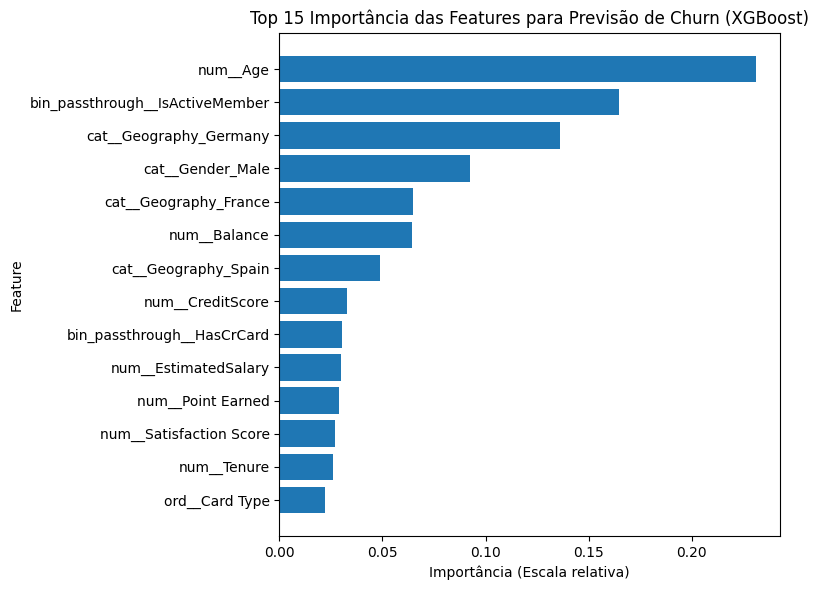

In [263]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'].head(15), feature_importance_df['Importance'].head(15))
plt.xlabel('Importância (Escala relativa)')
plt.ylabel('Feature')
plt.title('Top 15 Importância das Features para Previsão de Churn (XGBoost)')
plt.gca().invert_yaxis() 
plt.tight_layout() 
plt.show()

Função para a criação de 3 novas features:

* `Zero_Balance_Indicator`: Indicador binário para contas com saldo zerado.
    * Ter saldo em conta zerado aparenta ser um forte indicador.
* `Age_x_IsActiveMember`: Idade vz se é um mebro ativo
    * Medida de interação. Ajuda o modelo a entender como duas variáveis podem interagir entre si.
* `Age_Group`: Transforma a idade em categorias discretas.

In [264]:
def create_new_features(df):
    df_copy = df.copy()

    # 1. Indicador de saldo zero
    df_copy['Zero_Balance_Indicator'] = (df_copy['Balance'] == 0).astype(int)

    # 2. Interação Idade x Membro Ativo
    df_copy['Age_x_IsActiveMember'] = df_copy['Age'] * df_copy['IsActiveMember']

    # 3. Exemplo de categoria de idade (simples)
    df_copy['Age_Group'] = pd.cut(df_copy['Age'],
                                  bins=[0, 30, 50, np.inf],
                                  labels=['Young', 'Adult', 'Senior'],
                                  right=False) # Garante que 30 esteja no 'Adult'

    return df_copy

In [265]:
from sklearn.preprocessing import FunctionTransformer
feature_engineer_transformer = FunctionTransformer(create_new_features, validate=False)

In [266]:
X_train_after_fe = create_new_features(X_train.copy())

print("Colunas do X_train original:")
print(X_train.columns.tolist())
print("\nColunas do X_train após a feature engineering:")
print(X_train_after_fe.columns.tolist())

Colunas do X_train original:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']

Colunas do X_train após a feature engineering:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned', 'Zero_Balance_Indicator', 'Age_x_IsActiveMember', 'Age_Group']


In [267]:
numerical_features_updated = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'EstimatedSalary', 'Point Earned', 'Satisfaction Score',
    'Age_x_IsActiveMember', 
    'Zero_Balance_Indicator'
]

categorical_features_updated = [
    'Geography', 'Gender',
    'Age_Group' 
]

binary_passthrough_features_updated = [
    'HasCrCard', 'IsActiveMember' 
]

ordinal_features_updated = ['Card Type']

print("\nNovas listas de features para o ColumnTransformer:")
print("Numéricas:", numerical_features_updated)
print("Categóricas:", categorical_features_updated)
print("Binárias Passthrough:", binary_passthrough_features_updated)
print("Ordinais:", ordinal_features_updated)



Novas listas de features para o ColumnTransformer:
Numéricas: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score', 'Age_x_IsActiveMember', 'Zero_Balance_Indicator']
Categóricas: ['Geography', 'Gender', 'Age_Group']
Binárias Passthrough: ['HasCrCard', 'IsActiveMember']
Ordinais: ['Card Type']


In [268]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


preprocessor_updated = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_updated),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_updated),
        ('bin_passthrough', 'passthrough', binary_passthrough_features_updated),
        ('ord', OrdinalEncoder(categories='auto'), ordinal_features_updated) 
    ],
    remainder='drop'
)

print("\nNovo ColumnTransformer (preprocessor_updated) criado.")


Novo ColumnTransformer (preprocessor_updated) criado.


In [269]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier 

pipeline_xgb_fe = Pipeline(steps=[
    ('feature_engineering', feature_engineer_transformer), 
    ('preprocessor', preprocessor_updated),             
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight_val,
        enable_categorical=True,
        tree_method='hist'
    ))
])

print("\nNovo pipeline 'pipeline_xgb_fe' com Engenharia de Features criado.")


Novo pipeline 'pipeline_xgb_fe' com Engenharia de Features criado.


In [270]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print("\nIniciando otimização de hiperparâmetros para XGBoost com FE...")


param_dist_xgb = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__max_depth': randint(3, 10),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__colsample_bytree': uniform(0.6, 0.4),
    'classifier__gamma': uniform(0, 0.5),
    'classifier__lambda': uniform(1, 2)
}

random_search_xgb_fe = RandomizedSearchCV(
    pipeline_xgb_fe, 
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=2 
)

random_search_xgb_fe.fit(X_train, y_train)

print(f"\nMelhores parâmetros para XGBoost com FE: {random_search_xgb_fe.best_params_}")
print(f"Melhor AUC-ROC (CV) para XGBoost com FE: {random_search_xgb_fe.best_score_:.4f}")

# --- Avaliar o melhor modelo no conjunto de teste ---
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

best_xgb_model_fe = random_search_xgb_fe.best_estimator_
print("\nAvaliando o Melhor XGBoost com FE no Conjunto de Teste:")
y_pred_proba_xgb_fe = best_xgb_model_fe.predict_proba(X_test)[:, 1]
y_pred_class_xgb_fe = best_xgb_model_fe.predict(X_test)

print(f"AUC-ROC (Teste): {roc_auc_score(y_test, y_pred_proba_xgb_fe):.4f}")
print("Classification Report (Teste):")
print(classification_report(y_test, y_pred_class_xgb_fe))
print("Confusion Matrix (Teste):")
print(confusion_matrix(y_test, y_pred_class_xgb_fe))


Iniciando otimização de hiperparâmetros para XGBoost com FE...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__colsample_bytree=0.6232334448672797, classifier__gamma=0.4330880728874676, classifier__lambda=2.2022300234864174, classifier__learning_rate=0.22242177333881366, classifier__max_depth=8, classifier__n_estimators=408, classifier__subsample=0.9879639408647978; total time=   0.3s
[CV] END classifier__colsample_bytree=0.6232334448672797, classifier__gamma=0.4330880728874676, classifier__lambda=2.2022300234864174, classifier__learning_rate=0.22242177333881366, classifier__max_depth=8, classifier__n_estimators=408, classifier__subsample=0.9879639408647978; total time=   0.4s[CV] END classifier__colsample_bytree=0.6232334448672797, classifier__gamma=0.4330880728874676, classifier__lambda=2.2022300234864174, classifier__learning_rate=0.22242177333881366, classifier__max_depth=8, classifier__n_estimators=408, classifier__subsample=0.9879639408647978; 

In [271]:
import joblib
joblib.dump(best_xgb_model_fe, 'modelo_churn_xgboost_com_FE_otimizado.pkl')

['modelo_churn_xgboost_com_FE_otimizado.pkl']

**Conclusão**

Utilizamos o algoritmo XGBoost, conhecido por sua alta performance em problemas de classificação, e incorporamos engenharia de atributos para extrair o máximo de valor dos dados brutos.

A busca pelos melhores hiperparâmetros foi realizada através da validação cruzada, resultando em um AUC-ROC de 0.8597, indicando uma boa capacidade preditiva geral do modelo.

Ao avaliar melhor o modelo no conjunto de teste, especialmente o AUC-ROC de 0.8785, demonstra o modelo tem uma boa capacidade de distinguir entre clientes que irão e os que não irão cancelar. A Acurácia de 82%, embora numéricamente alta, deve ser interpretada no contexto do desbalanceamento dos dados, sendo as métricas Precision e Recall para a classe de churn muito mais informativas

Ao análisar o Relatório de Classificação e a Matriz de confusão, podemos extrair insights mais detalhados sobre o desempenho de cada classe:

| Classe | Precission | Recall | F1-Score | Suport |
|--------|------------|--------|----------|--------|
| 0 | 0.93 | 0.84 | 0.88 | 1592 |
| **1** | **0.55** | **0.75** | **0.64** | **408** |

* **Recall para classe 1 (churn): 0.75 (75%)**
    * Isso significa que o modelo conseguiu identificar 75% dos clientes que de fato iriam cancelar. Esta é um métrica crucial para problemas de churn, poir minimiza a perda de clientes valiosos (Falso Negativos), que é o foco principal ao lidar com classes minoritárias e o custo de um falso negativo é geralmente alto.

* **Precission para a classe 1 (churn): 0.55 (55%)**
    * Quando o modelo prevê que uma clase irá cancelar (churn), ele acerta em 55% das vezes. Embora este valor inclua um número considerável de falsos positivos (cliente sinalizados que não deram churn), é um tradeoff aceitavel para garantir um recall de classe minoritária.

Matrix de confusão:
|  | Previsão: Não Churn (0) | Previsão: Churn (1) |
|--|-------------------------|---------------------|
|**Real: Não Churn (0)**| 1341 | 251 |
|**Real: Churn (1)**| 101 | 307 |

* **Verdadeiros Positivos (TP): 307** - Clientes que cancelaram e foram corretamente previstos como churn.
* **Verdadeirros Negativos (TN): 1341** - Clientes que não cancelaram e que foram corretamente previstos. como não churn.
* **Falsos Positivos (FP): 251** - Clientes que não cancelaram, mas foram erroneamente previstos como churn (Erro Tipo I).
* **Falsos Negativos (FN): 101** - Cliente que cancelaram, mas foram erroneamente previstos como não churn(Erro Tipo II).

Acredito que se fosse dedicado mais tempo e esforço à engenharia de atributos, explorando novas tranformações ou a criação de atributos mais complexos a partir dos dados existentes, o modelo poderia ter um desempenho ainda melhor. Estratégias adicionais para lidar com desbalanceamento, como *oversampling* ou *NearSampling* mais avançados, bem como o ajuste fino de algoritmos que são sensíveis ao desbalanceamento.

**Próximos Passos e Recomendações:**

Com base neste modelo, as seguintes ações podem ser consideradas:

1. **Intervenção e Proatividade:** Os clientes identificados com alta probabilidade de churn podem ser alvo de campanhas de retenção personalizadas, ofertas especiais ou contato direto do serviço de atendimento ao cliente.

2. **Análise de Causa Raiz:** Para os falsos negativos, é fundamental invetigar as razões para o churn para aprimorar futuras versões do modelo e estratégias de retenção.

3. **Monitoramenteo Contínuo:** O modelo deve ser monitorado regularmente em preodução para garantir que se desempenho não se degrade com o tempo, à medida que os padrões de comportamento dp cliente evoluem.

4. **Feature Inportance:** Analisar a importância das features do modelo XGBoost pode fornecer insights valiosos sobre quais fatores mais contribuem para o churn, auxiliando na formulação de estratégias de negócios.

O modelo desenvolvido representa uma ferramente poderosa para a equipe de negócios, permitindo uma abordagem mas proativa e baseada em dados para a gestão da retenção de clientes.